# 5 Всё вместе + SciPy


### Сгенерируйте точки (y, x) (500 будет достаточно), удовлетворяющие зависимости y = x^3 + 2x^2 − 3x + 2 и, затем, с помощью numpy.random добавьте к координатам y нормальный шум.

In [104]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.optimize import minimize 
% matplotlib inline

In [105]:
x = np.linspace(-5,5,500)

In [134]:

def func(x):
    return x**3 + 2*x**2 - 3*x + 2 


In [135]:
#y = y + np.random.normal(0, 1, size = 500)
y = np.array([func(x)for x in x ])
y_noize = np.array([(func(x) + np.random.normal(0,10)) for x in x ])

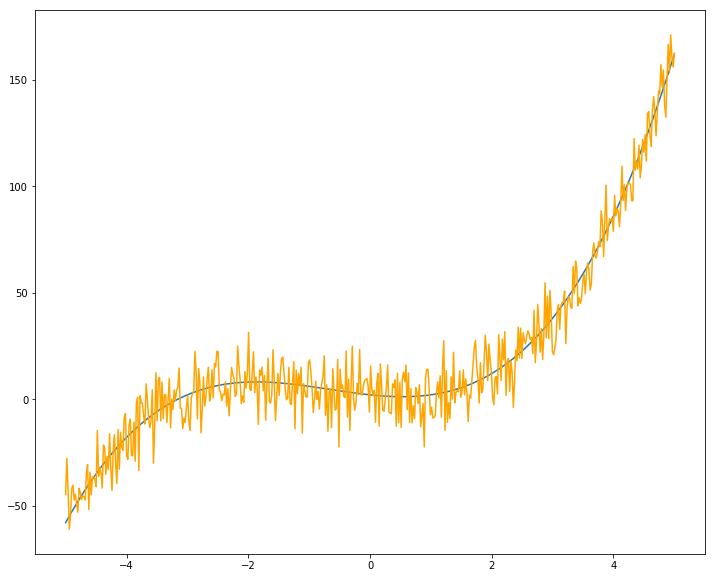

In [136]:
plt.figure(figsize = (12,10))
plt.plot(x,y)
plt.plot(x,y_noize,color = "orange")



### С помощью scipy восстановите исходную зависимость, считая известной степень полинома. Вам поможет curvefit или scipy.optimize.minimize, запущенный для суммы квадратичных отклонений.

In [137]:
coef = np.polyfit(x,y,3)


In [138]:
coef

array([ 1.,  2., -3.,  2.])

In [139]:
coef = np.polyfit(x,y_noize,3) 

In [140]:
coef

array([ 0.98057952,  2.04424434, -2.85151225,  1.52725018])

In [151]:
rec_y = np.array([coef[0]*x**3 + coef[1]*2*x**2 - coef[2]*3*x + coef[3]*2] for x in x)

def func_rec(x):
    return coef[0]*x**3 + coef[1]*2*x**2 - coef[2]*3*x + coef[3]*2


In [156]:
def negative_func(x):
    return (-1)*func(x)

In [157]:
x_max = minimize(func, 3).x
y_max = func_rec(x_max)
x_min = minimize(negative_func, -3).x
y_min = negative_func(x_min)


In [158]:
print(x_max,y_max)
print(x_min,y_min)

[0.53518378] [8.95409282]
[-1.86851713] [-8.06460493]


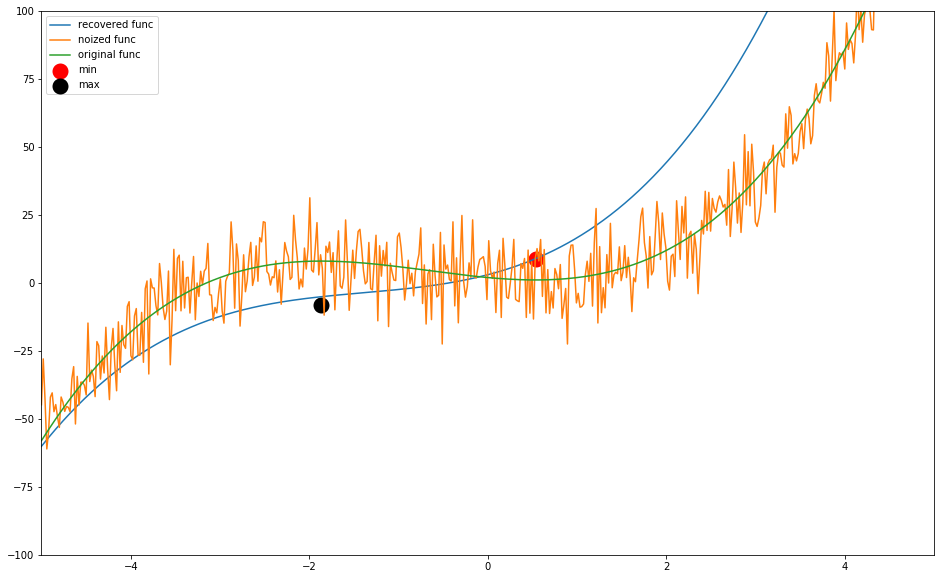

In [159]:
plt.figure(figsize = (16,10))
plt.xlim(-5, 5)
plt.ylim(-100,100)
plt.plot(x,[func_rec(x) for x in x], label = "recovered func")
plt.plot(x,y_noize, label = 'noized func')
plt.plot(x,y, label = 'original func')
plt.scatter(x_max[0],y_max, linewidths=10, c = 'red', label = 'min')
plt.scatter(x_min[0],y_min, linewidths=10, color = 'black', label = 'max')
plt.legend()
#